**Projet TNS**
*CHEMMAM Fatima Ezzahra*
# 1/Convolution de deux signaux numériques (en Python):

Entrez le signal X (valeurs séparées par des espaces) :  1 2 4
Entrez le signal Y (valeurs séparées par des espaces) :  3 6 8 


Signal x: [1.0, 2.0, 4.0]
Signal y: [3.0, 6.0, 8.0]
Résultat de la convolution (manuel) : [ 3. 12. 32. 40. 32.]
Résultat de la convolution (numpy) : [ 3. 12. 32. 40. 32.]


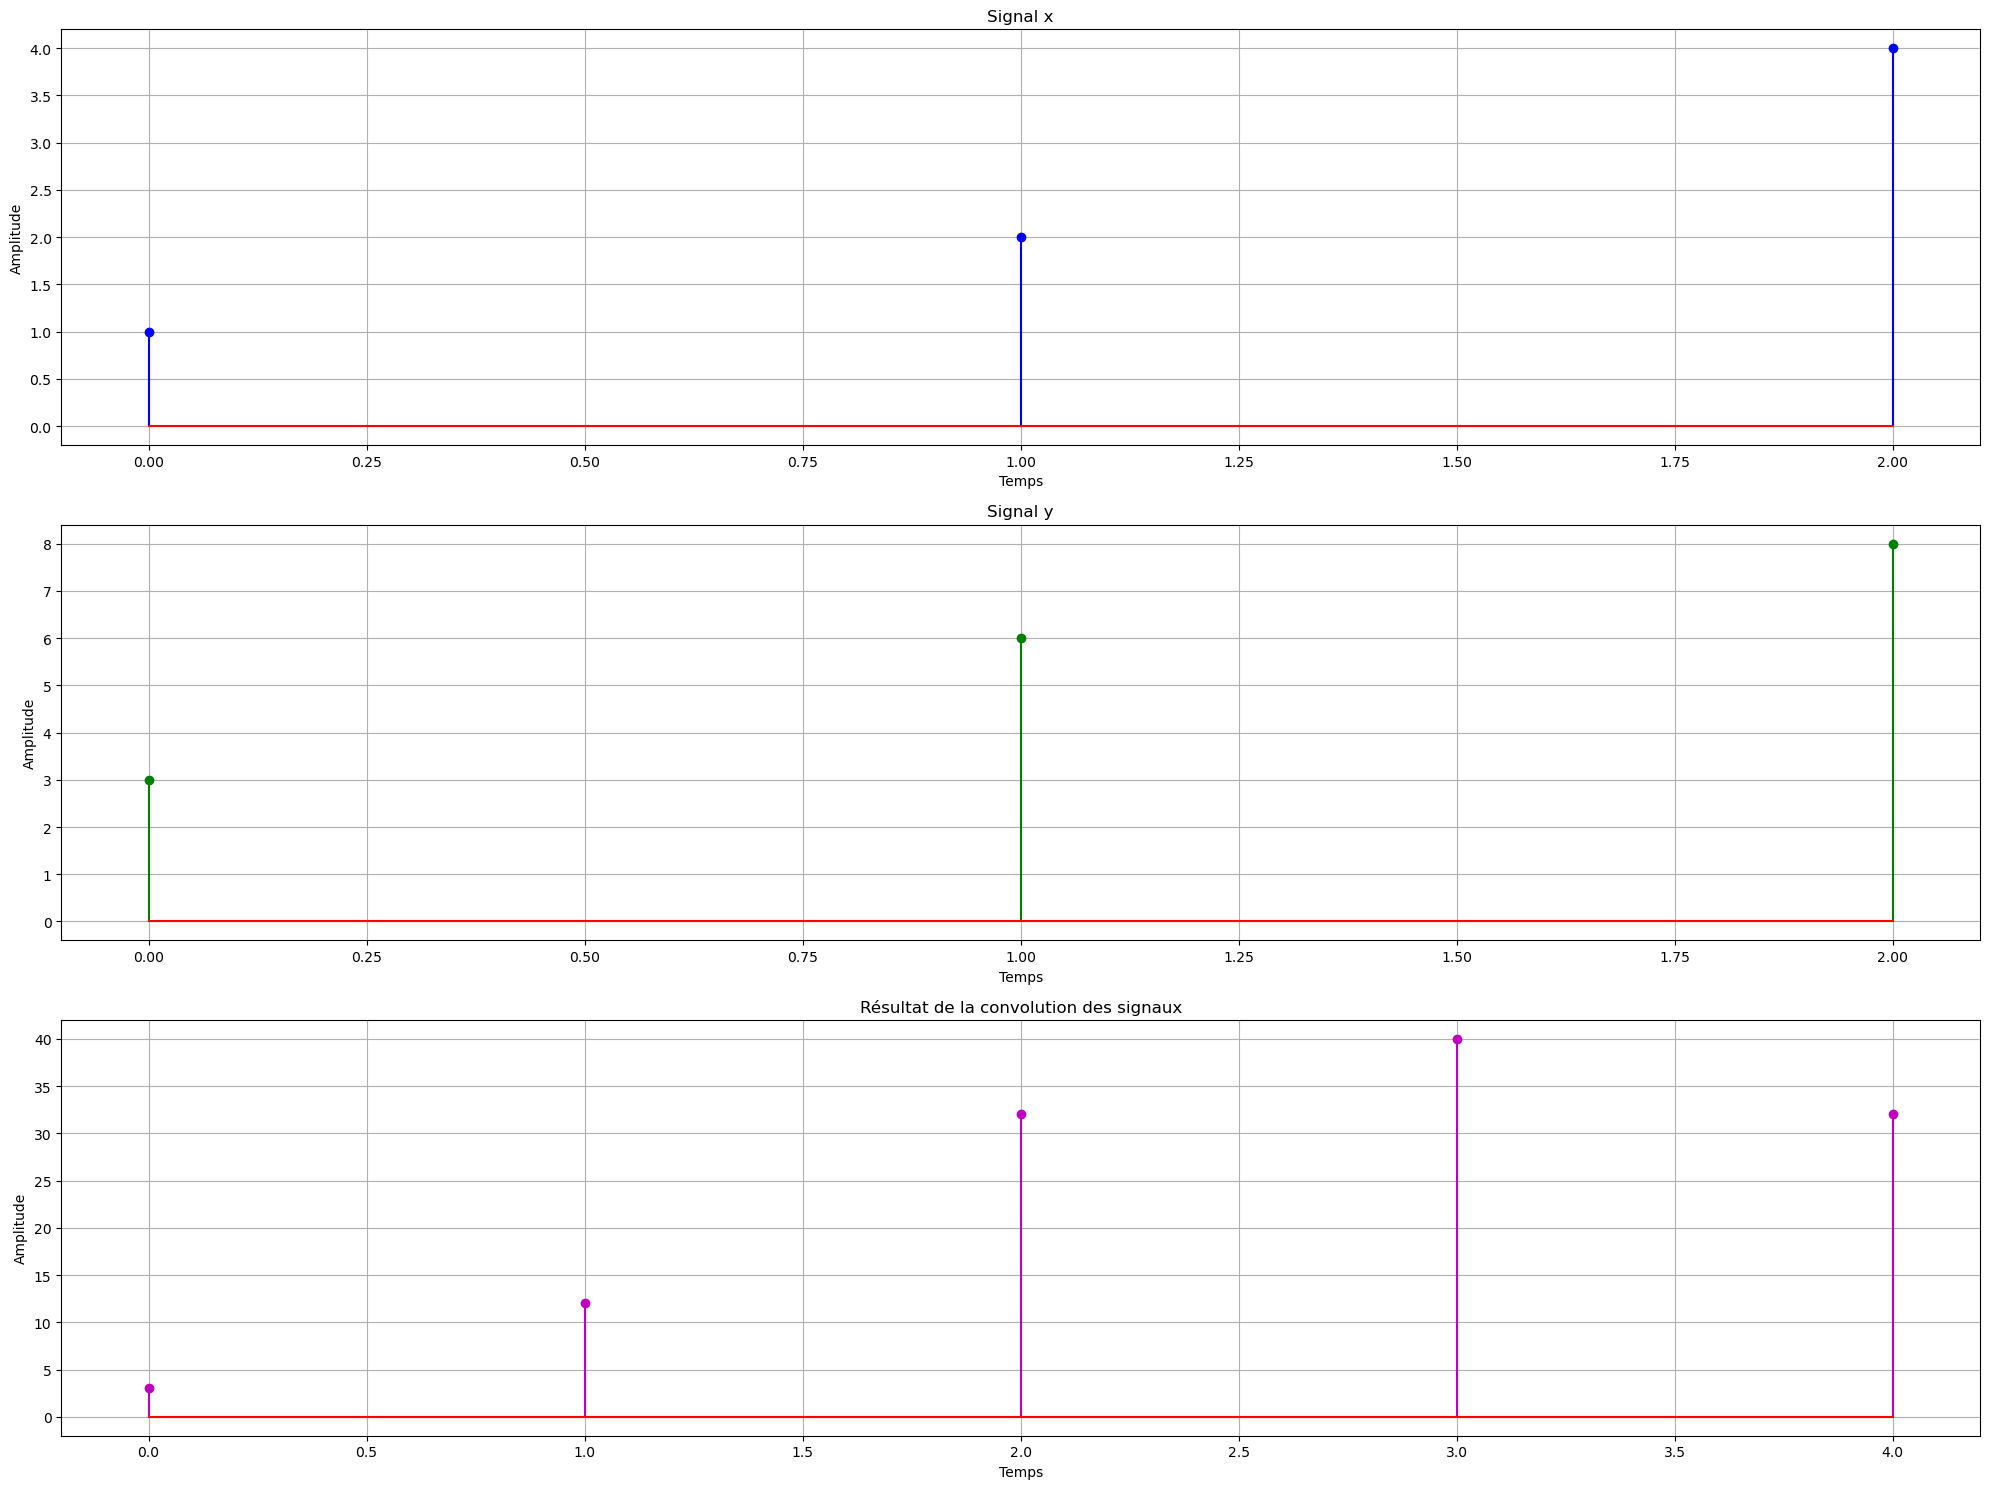

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de convolution manuelle
def convolution(x, y):
    
    len_x = len(x)
    len_y = len(y)
    
    
    output_size = len_x + len_y - 1
    
   
    h = np.zeros(output_size)

    
    for i in range(len_x):
        for j in range(len_y):
            h[i + j] += x[i] * y[j]  

    return h


x = list(map(float, input("Entrez le signal X (valeurs séparées par des espaces) : ").split()))
y = list(map(float, input("Entrez le signal Y (valeurs séparées par des espaces) : ").split()))


resultat = convolution(x, y)


np_result = np.convolve(x, y, mode='full')

# Affichage des résultats dans la console
print("Signal x:", x)
print("Signal y:", y)
print("Résultat de la convolution (manuel) :", resultat)
print("Résultat de la convolution (numpy) :", np_result)


plt.figure(figsize=(20, 15))


plt.subplot(3, 1, 1)
plt.stem(range(len(x)), x, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Signal x")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(3, 1, 2)
plt.stem(range(len(y)), y, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title("Signal y")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(3, 1, 3)
plt.stem(range(len(resultat)), resultat, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title("Résultat de la convolution des signaux")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()


plt.show()


# 2/Spectre (FFT - Fast Fourier Transform) en Python

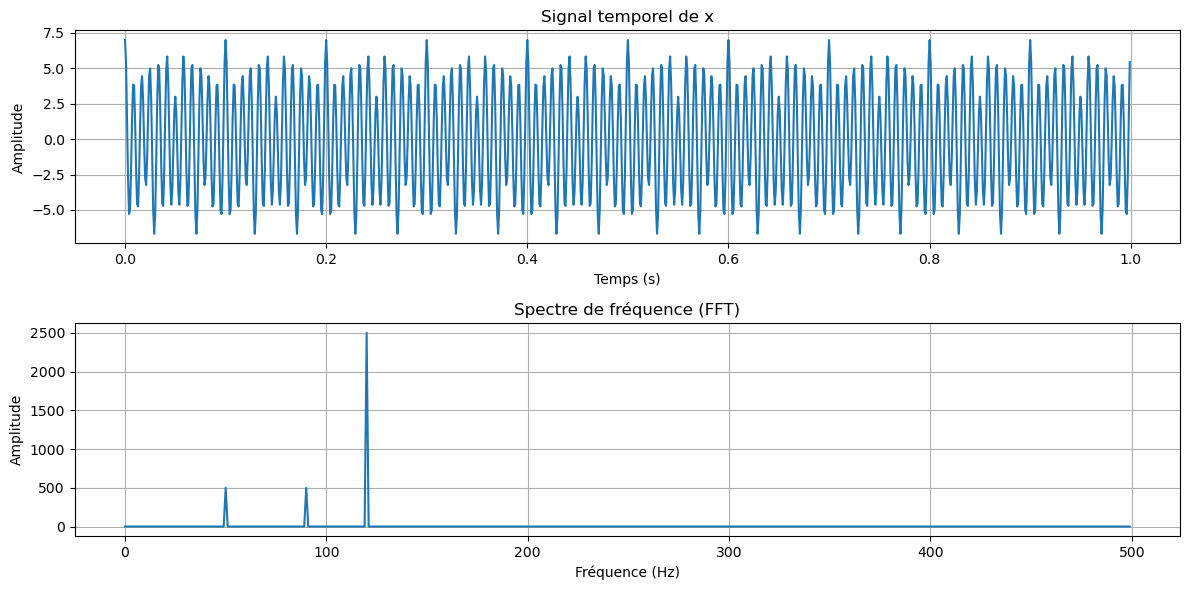

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Fréquence d'échantillonnage 
Fs = 1000  


T = 1     

Fs (1000 échantillons par seconde)
t = np.linspace(0, T, int(Fs*T), endpoint=False)  


f1, f2, f3 = 50, 120, 180  # Fréquences des sinusoïdes

x = np.cos(2 * np.pi * f1 * t) + 5 * np.cos(2 * np.pi * f2 * t) + np.cos(np.pi * f3 * t)

# Calcul de la FFT 
fft_result = np.fft.fft(x)  
fft_frequency = np.fft.fftfreq(len(x), 1/Fs) 


positive_freqs = fft_frequency[:len(fft_frequency)//2] 
partie_positive = np.abs(fft_result[:len(fft_result)//2])  

# Affichage des résultats 
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1) 
plt.plot(t, x)
plt.title("Signal temporel de x")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid(True)  

# Affichage du spectre de fréquence (FFT)
plt.subplot(2, 1, 2) 
plt.plot(positive_freqs, partie_positive)
plt.title("Spectre de fréquence (FFT)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True) 


plt.tight_layout()


plt.show()


# 3/Filtrage numérique idéal et réel en convolution

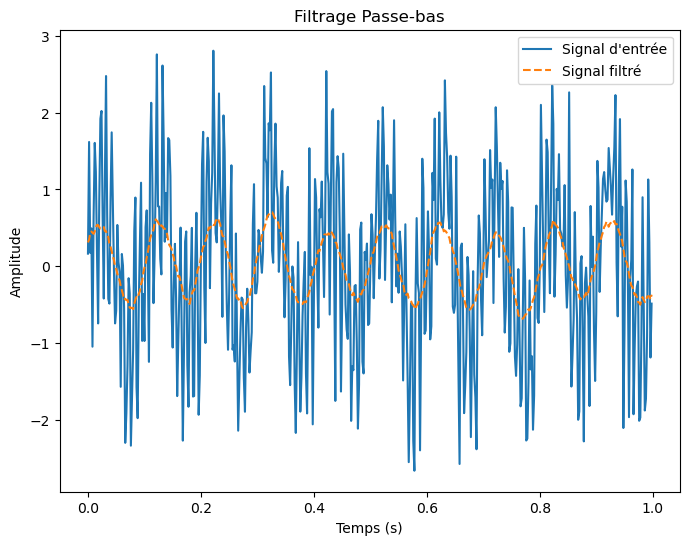

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Signal d'entrée avec du bruit
t = np.linspace(0, 1, 500, endpoint=False)
f1, f2 = 10, 100  
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + 0.5 * np.random.randn(len(t))


window_size = 30
filter_kernel = np.ones(window_size) / window_size  # Moyenne mobile
filtered_signal = np.convolve(signal, filter_kernel, mode='same')

# Afficher le signal et le signal filtré
plt.figure(figsize=(8, 6))
plt.plot(t, signal, label='Signal d\'entrée')
plt.plot(t, filtered_signal, label='Signal filtré', linestyle='--')
plt.title("Filtrage Passe-bas")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


# 4/Bonus: Filtres Numériques FIR (Filtre à Réponse Impulsionnelle Finie) et IIR (Filtre à Réponse Impulsionnelle Infinie)

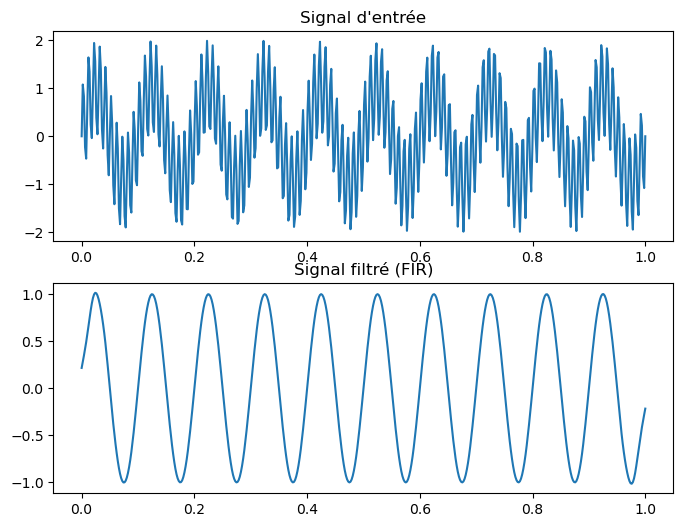

In [89]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Paramètres du filtre FIR
fs = 500 
cutoff = 50  
numtaps = 101  

# Concevoir un filtre FIR passe-bas
fir_filter = signal.firwin(numtaps, cutoff, fs=fs)


t = np.linspace(0, 1, fs)
signal_input = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)  # Deux fréquences

# Appliquer le filtre FIR
signal_output = np.convolve(signal_input, fir_filter, mode='same')

# Afficher les résultats
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.title("Signal d'entrée")
plt.plot(t, signal_input)
plt.subplot(2, 1, 2)
plt.title("Signal filtré (FIR)")
plt.plot(t, signal_output)
plt.show()


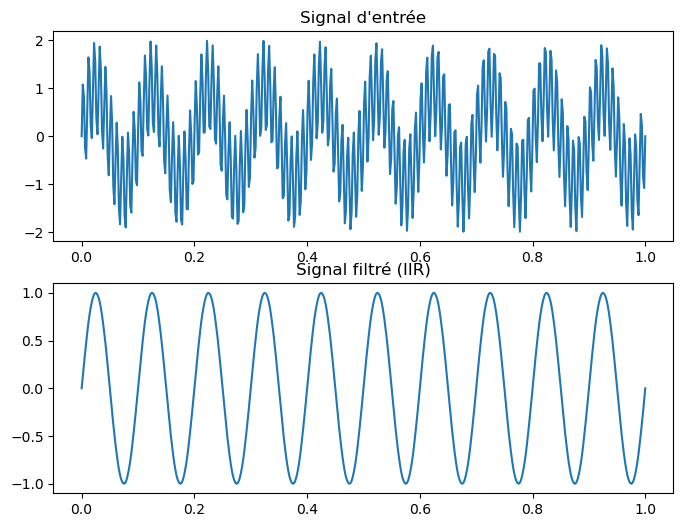

In [91]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Paramètres du filtre IIR
fs = 500 
cutoff = 50  
order = 4  


b, a = signal.butter(order, cutoff, fs=fs, btype='low')

# Créer un signal de test
t = np.linspace(0, 1, fs)
signal_input = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)  # Deux fréquences

# Appliquer le filtre IIR
signal_output = signal.filtfilt(b, a, signal_input)

# Afficher les résultats
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.title("Signal d'entrée")
plt.plot(t, signal_input)
plt.subplot(2, 1, 2)
plt.title("Signal filtré (IIR)")
plt.plot(t, signal_output)
plt.show()


# Conclusion

**La convolution permet de simuler l'effet de systèmes linéaires sur des signaux.
La FFT (Transformée de Fourier Rapide) est utilisée pour analyser les composantes fréquentielles d'un signal.
Les filtres numériques (FIR et IIR) permettent de filtrer des signaux dans différentes situations. Les FIR ont une réponse impulsionnelle finie, tandis que les IIR peuvent avoir une réponse infinie.**